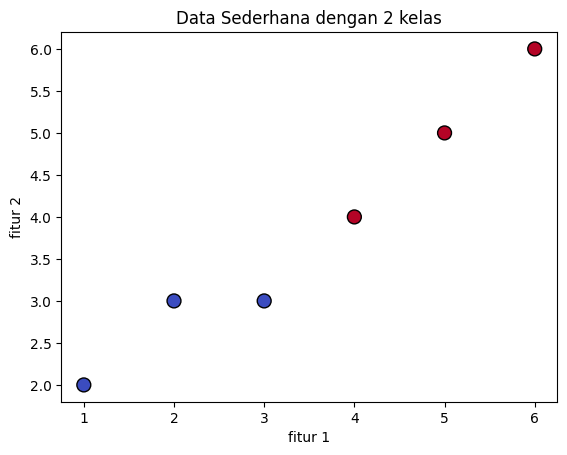

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#buat data sederhana
x = np.array([[1,2],[2,3],[3,3],[4,4],[5,5],[6,6]]) #data point
y = np.array([0,0,0,1,1,1])

plt.scatter(x[:,0],x[:,1],c = y, cmap='coolwarm',s =100, edgecolor='k',label="Data Points")
plt.title('Data Sederhana dengan 2 kelas')
plt.xlabel('fitur 1')
plt.ylabel('fitur 2')
plt.show()

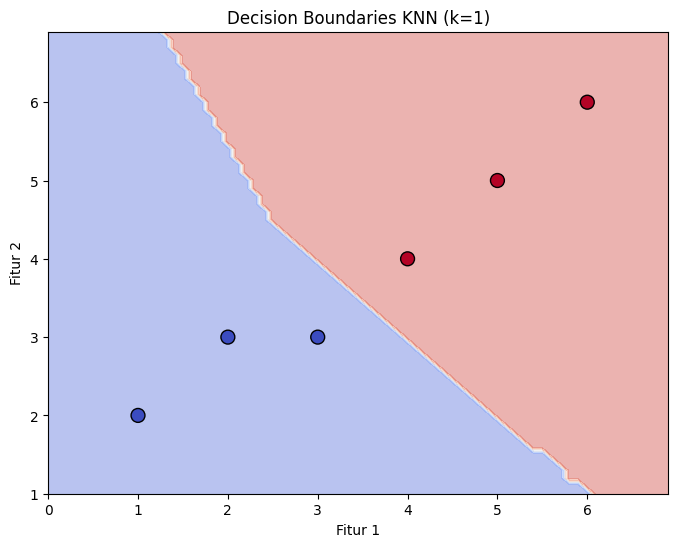

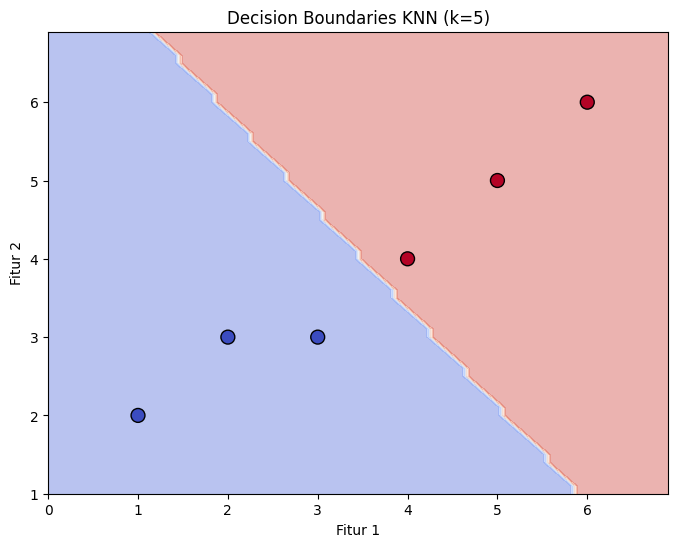

In [ ]:
def plot_batas_knn(k):
    # Buat Classifier KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)

    # Buat grid untuk menampilkan batas keputusan (decision boundaries)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Prediksi kelas untuk setiap titik di grid
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=100, edgecolor='k', label="Data Points")
    # c=y gambar titiknya punya warna sesuai kelas pada y, s adalah ukuran data point
    plt.title(f'Decision Boundaries KNN (k={k})')
    plt.xlabel('Fitur 1')
    plt.ylabel('Fitur 2')
    plt.show()

plot_batas_knn(1)
plot_batas_knn(5)

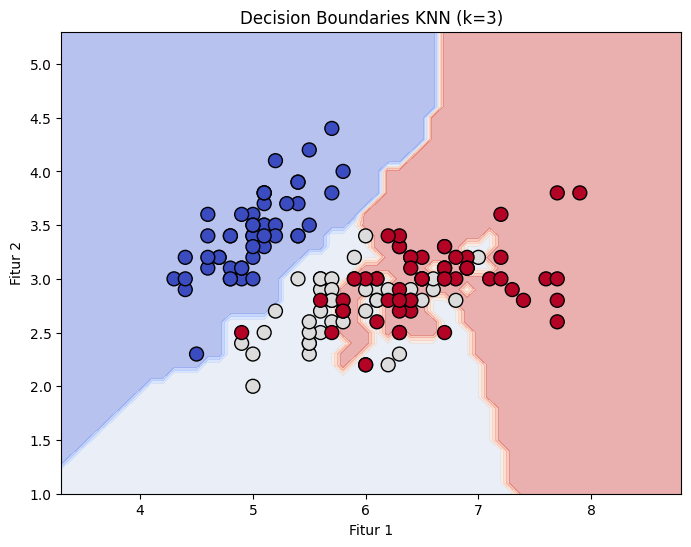

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()
x = iris.data[:, :2]  # Menggunakan fitur sepal length dan sepal width untuk visualisasi 2D
y = iris.target

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train model
knn.fit(x_train, y_train)

# Predict using the model
y_pred = knn.predict(x_test)

# Create grid for decision boundary visualization
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class for each point in the grid
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # Mengubah array 2D menjadi 1D untuk combine
z = z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=100, edgecolor='k', label="Data Points")
plt.title(f'Decision Boundaries KNN (k={3})')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()
x = iris.data[:, :2]  # Menggunakan fitur sepal length dan sepal width untuk visualisasi 2D
y = iris.target

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

# Optimal case (k=5)
knn_optimal = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_optimal.fit(x_train, y_train)

# Calculate training and testing accuracy
akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train))  # Data training dan hasil prediksi
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test))  # Data testing dan hasil prediksi

# Print the accuracy results
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_optimal_train * 100:.2f}%")
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 81.67%
Good Generalization (k=5) - Testing Accuracy: 86.67%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Overfitting case (k=1)
knn_overfitting = KNeighborsClassifier(n_neighbors=1)

# Train the model
knn_overfitting.fit(x_train, y_train)

# Calculate training and testing accuracy
akurasi_overfitting_train = accuracy_score(y_train, knn_overfitting.predict(x_train))  # Data training dan hasil prediksi
akurasi_overfitting_test = accuracy_score(y_test, knn_overfitting.predict(x_test))  # Data testing dan hasil prediksi

# Print the accuracy results
print(f"Overfitting (k=1) - Training Accuracy: {akurasi_overfitting_train * 100:.2f}%")
print(f"Overfitting (k=1) - Testing Accuracy: {akurasi_overfitting_test * 100:.2f}%")


Overfitting (k=1) - Training Accuracy: 94.17%
Overfitting (k=1) - Testing Accuracy: 66.67%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Underfitting case (k=100)
knn_underfitting = KNeighborsClassifier(n_neighbors=120)

# Train the model
knn_underfitting.fit(x_train, y_train)

# Calculate training and testing accuracy
akurasi_underfitting_train = accuracy_score(y_train, knn_underfitting.predict(x_train))  # Data training dan hasil prediksi
akurasi_underfitting_test = accuracy_score(y_test, knn_underfitting.predict(x_test))  # Data testing dan hasil prediksi

# Print the accuracy results
print(f"Underfitting (k=100) - Training Accuracy: {akurasi_underfitting_train * 100:.2f}%")
print(f"Underfitting (k=100) - Testing Accuracy: {akurasi_underfitting_test * 100:.2f}%")


Underfitting (k=100) - Training Accuracy: 36.67%
Underfitting (k=100) - Testing Accuracy: 20.00%


#Tugas

Gunakan data sklearn untuk Breast Cancer menggunakan KNN Classifier (ambil 2 fitur pertama saja), gunakan n_neighbors dengan mengambil jumlah 2 angka dari belakang di NIM mahasiswa masing-masing (misal 1.221195, maka n_neighbors = 95) buat visualisasi decision boundaries dan sebutkan apakah hasil akurasinya good generalization, overfitting, atau underfitting

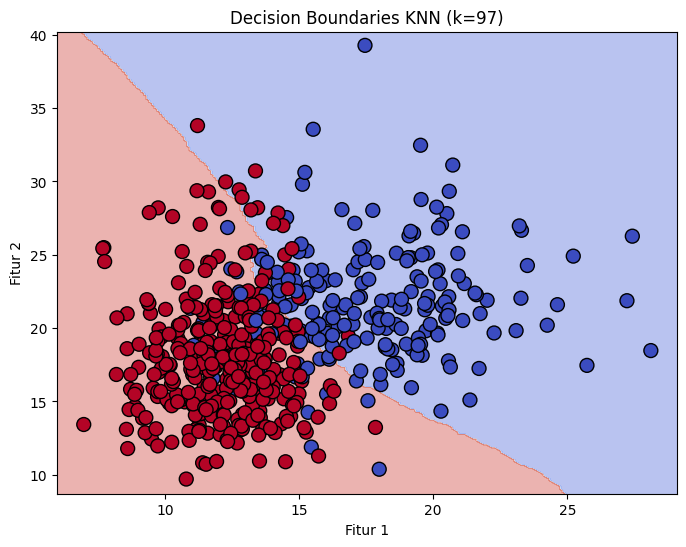

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load breast_cancer dataset
breast_cancer = load_breast_cancer()
x = breast_cancer.data[:, :2]  # Menggunakan 2 fitur pertama untuk visualisasi 2D
y = breast_cancer.target

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create KNN classifier NIM saya adalah : I.2210497
knn = KNeighborsClassifier(n_neighbors=97)

# Train model
knn.fit(x_train, y_train)

# Predict using the model
y_pred = knn.predict(x_test)

# Create grid for decision boundary visualization
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class for each point in the grid
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # Mengubah array 2D menjadi 1D untuk combine
z = z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=100, edgecolor='k', label="Data Points")
plt.title(f'Decision Boundaries KNN (k={97})')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

# Optimal case (k=97)
knn_optimal = KNeighborsClassifier(n_neighbors=97)

# Train the model
knn_optimal.fit(x_train, y_train)

# Calculate training and testing accuracy
akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train))  # Data training dan hasil prediksi
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test))  # Data testing dan hasil prediksi

# Print the accuracy results
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_optimal_train * 100:.2f}%")
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 89.67%
Good Generalization (k=5) - Testing Accuracy: 83.33%


Jadi ketika n_neighbors = 97 (NIM Saya : I.2210497) dengan hasil akurasi Training Accuracy: 89.67% dan Testing Accuracy: 83.33% maka model ini bisa dikatakan sebagai Good Generalization